# Working with Multidimensional Coordinates

__Author__: Ryan Abernathey

Many datasets have physical coordinates which differ from their logical coordinates. Xarray provides several ways to plot and analyze such datasets.

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [25]:
 ds = xr.tutorial.load_dataset('rasm')

In [26]:
ds

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) datetime64[ns] 1980-09-16T12:00:00 1980-10-17 ...
    xc       (y, x) float64 189.2 189.4 189.6 189.7 189.9 190.1 190.2 190.4 ...
    yc       (y, x) float64 16.53 16.78 17.02 17.27 17.51 17.76 18.0 18.25 ...
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:                   Tue Dec 2

In this example, the logical coordinates are x and y, while the physical coordinates are xc and yc, which represent the latitudes and longitude of the data.

In [27]:
ds.xc.attrs

OrderedDict([('long_name', 'longitude of grid cell center'),
             ('units', 'degrees_east'),
             ('bounds', 'xv')])

In [28]:
ds.yc.attrs

OrderedDict([('long_name', 'latitude of grid cell center'),
             ('units', 'degrees_north'),
             ('bounds', 'yv')])

## Plotting

Let’s examine these coordinate variables by plotting them.

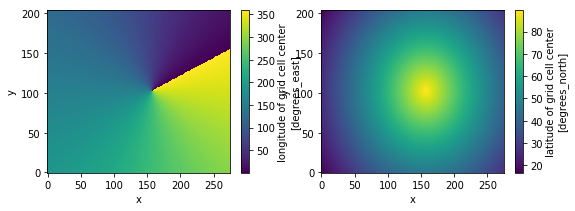

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,3))
ds.xc.plot(ax=ax1)
ds.yc.plot(ax=ax2);

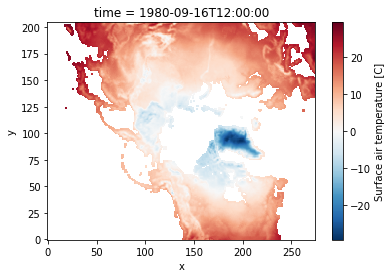

In [32]:
ds.Tair[0].plot();

In order to visualize the data on a conventional latitude-longitude grid, we can take advantage of xarray’s ability to apply cartopy map projections.

In [33]:
plt.figure(figsize=(7,2));

<Figure size 504x144 with 0 Axes>

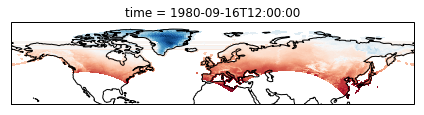

In [40]:
ax = plt.axes(projection=ccrs.PlateCarree())
ds.Tair[0].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                             x='xc', y='yc', add_colorbar=False)
ax.coastlines()
plt.tight_layout()

## Multidimensional Groupby

The above example allowed us to visualize the data on a regular latitude-longitude grid. But what if we want to do a calculation that involves grouping over one of these physical coordinates (rather than the logical coordinates), for example, calculating the mean temperature at each latitude. This can be achieved using xarray’s groupby function, which accepts multidimensional variables. By default, groupby will use every unique value in the variable, which is probably not what we want. Instead, we can use the groupby_bins function to specify the output coordinates of the group.

In [41]:
lat_bins = np.arange(0, 91, 2)

In [42]:
lat_center = np.arange(1, 90, 2)

In [43]:
Tair_lat_mean = ds.Tair.groupby_bins('xc', lat_bins, labels=lat_center).mean()

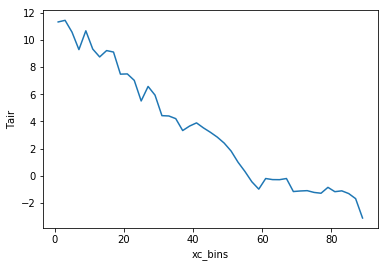

In [44]:
Tair_lat_mean.plot();

Note that the resulting coordinate for the groupby_bins operation got the _bins suffix appended: xc_bins. This help us distinguish it from the original multidimensional variable xc.